# Column name explanation

Dataset - https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction

Column names are self explanatory.<br>
Some steps to talk are:
- understand our problem statement, predict the price of a car based on provided metrics
- pre process, clean data, split data, feature selection.
- create ML model, test it using different metrics.


In [620]:
#my version
import tensorflow as tf
from tensorflow import keras
import math
#layers for NN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
#oretrained model for transfer learning
from keras.models import Model
from keras.applications import vgg19

import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets



In [621]:
df = pd.read_csv('C:/Users/Alexv/Desktop/predcarprice/predictiondataset/car_price.csv')
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [622]:
#remove the first col literally called unnamed
df = df.drop(df.columns[0], axis=1)

# check for nulls
df.info() 

df.shape #5512 rows 9 cols


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   object
 2   kms_driven           5512 non-null   object
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   object
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   object
 8   Seats                5512 non-null   object
dtypes: int64(1), object(8)
memory usage: 387.7+ KB


(5512, 9)

In [623]:
df.isnull().sum() #double checking no nulls

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [624]:
df.duplicated().sum() #115 duplicated rows
df.drop_duplicates()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats
...,...,...,...,...,...,...,...,...,...
5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats
5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats
5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats
5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats


In [625]:
df['ownership'].value_counts()

1st Owner    3736
2nd Owner    1314
3rd Owner     359
4th Owner      84
5th Owner      12
0th Owner       7
Name: ownership, dtype: int64

In [626]:
# rename engine column to include CC to avoid confusion
df = df.rename(columns={'engine':'engine (cc)'})
df

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats
...,...,...,...,...,...,...,...,...,...
5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats
5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats
5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats
5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats


In [627]:
# lambda to remove the ' Seats' from the attribute
df['Seats'] = df['Seats'].apply(lambda x: x.rstrip(' Seats'))
df

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5
...,...,...,...,...,...,...,...,...,...
5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7
5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5
5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5
5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6


In [628]:
# make new column called currency for our two currencies, Lakh and Crore
# 1 Crore = 100 Lakh
# 100,000 Lakh = 1,217.07 USD

df.loc[df['car_prices_in_rupee'].str.contains('Lakh'), 'Currency'] = 'Lakh'
df.loc[df['car_prices_in_rupee'].str.contains('Crore'), 'Currency'] = 'Crore'

In [629]:
# one row (240) has "99,999" in the car price. Remove since d/n have Lakh or Crore
df=df.dropna()

In [630]:
# Continue strip of the columns. Dont need the CC in 1500 'cc' in the engine col
# We want some of our cols to turn into ints
df['engine (cc)'] = df['engine (cc)'].apply(lambda x: x.rstrip(' cc'))
df['ownership'] = df['ownership'].apply(lambda x: x.rstrip(' th Owner'))
df['ownership'] = df['ownership'].apply(lambda x: x.rstrip(' rd Owner'))
df['ownership'] = df['ownership'].apply(lambda x: x.rstrip(' nd Owner'))
df['ownership'] = df['ownership'].apply(lambda x: x.rstrip(' st Owner'))
df['kms_driven'] = df['kms_driven'].apply(lambda x: x.rstrip(' kms'))

# some rows have , and . we can remove them now. Same with the Lakh and Crore words at the end
df['kms_driven'] = df['kms_driven'].apply(lambda x: x.replace(',', '')) #31,146 turn into int
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(lambda x: x.rstrip(' Lakh'))
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(lambda x: x.replace('.', ''))
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(lambda x: x.rstrip(' Crore'))

C:\Users\Alexv\AppData\Local\Temp\ipykernel_14812\3414776288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine (cc)'] = df['engine (cc)'].apply(lambda x: x.rstrip(' cc'))
C:\Users\Alexv\AppData\Local\Temp\ipykernel_14812\3414776288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ownership'] = df['ownership'].apply(lambda x: x.rstrip(' th Owner'))
C:\Users\Alexv\AppData\Local\Temp\ipykernel_14812\3414776288.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [631]:
# turn the car price col into a float
df['car_prices_in_rupee']=df['car_prices_in_rupee'].astype('float') 

# Right now our car price col went from 10.03 Lakh -> 1003
# If the row is Crore (100 times of 1 Lakh) multi it by 100
df['car_prices_in_rupee']=np.where(df['Currency'] == 'Crore',
                                           df['car_prices_in_rupee'] * 100,
                                           df['car_prices_in_rupee'])

# Now all rows are sort of in Lakh (still in that 10.03 state) multi by 100K now
df['car_prices_in_rupee']=df['car_prices_in_rupee']*1000/82
df

C:\Users\Alexv\AppData\Local\Temp\ipykernel_14812\1158525128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_prices_in_rupee']=df['car_prices_in_rupee'].astype('float')
C:\Users\Alexv\AppData\Local\Temp\ipykernel_14812\1158525128.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_prices_in_rupee']=np.where(df['Currency'] == 'Crore',
C:\Users\Alexv\AppData\Local\Temp\ipykernel_14812\1158525128.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats,Currency
0,Jeep Compass 2.0 Longitude Option BSIV,12231.707317,86226,Diesel,Manual,1,2017,1956,5,Lakh
1,Renault Duster RXZ Turbo CVT,15646.341463,13248,Petrol,Automatic,1,2021,1330,5,Lakh
2,Toyota Camry 2.5 G,20000.000000,60343,Petrol,Automatic,1,2016,2494,5,Lakh
3,Honda Jazz VX CVT,9475.609756,26696,Petrol,Automatic,1,2018,1199,5,Lakh
4,Volkswagen Polo 1.2 MPI Highline,6280.487805,69414,Petrol,Manual,1,2016,1199,5,Lakh
...,...,...,...,...,...,...,...,...,...,...
5507,BMW X1 sDrive 20d xLine,35243.902439,45000,Diesel,Automatic,1,2018,2995,7,Lakh
5508,BMW M Series M4 Coupe,79146.341463,29000,Petrol,Automatic,2,2015,1968,5,Lakh
5509,Jaguar XF 2.2 Litre Luxury,16768.292683,90000,Diesel,Automatic,2,2013,2755,5,Lakh
5510,BMW 7 Series 730Ld,36463.414634,79000,Diesel,Automatic,3,2015,2967,6,Lakh


In [632]:
# df=pd.get_dummies(df,columns='')

# Change the types of cols to ints for kms driven, ownership, engine, etc
df = df.astype({'kms_driven':'int64', 'ownership':'int64', 'engine (cc)': 'int64', 'Seats': 'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5389 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5389 non-null   object 
 1   car_prices_in_rupee  5389 non-null   float64
 2   kms_driven           5389 non-null   int64  
 3   fuel_type            5389 non-null   object 
 4   transmission         5389 non-null   object 
 5   ownership            5389 non-null   int64  
 6   manufacture          5389 non-null   int64  
 7   engine (cc)          5389 non-null   int64  
 8   Seats                5389 non-null   int64  
 9   Currency             5389 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 463.1+ KB


In [633]:
df
# CURRENT ISSUE - Rupee price SHOULD be 1003000 but there are two extra zeros

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats,Currency
0,Jeep Compass 2.0 Longitude Option BSIV,12231.707317,86226,Diesel,Manual,1,2017,1956,5,Lakh
1,Renault Duster RXZ Turbo CVT,15646.341463,13248,Petrol,Automatic,1,2021,1330,5,Lakh
2,Toyota Camry 2.5 G,20000.000000,60343,Petrol,Automatic,1,2016,2494,5,Lakh
3,Honda Jazz VX CVT,9475.609756,26696,Petrol,Automatic,1,2018,1199,5,Lakh
4,Volkswagen Polo 1.2 MPI Highline,6280.487805,69414,Petrol,Manual,1,2016,1199,5,Lakh
...,...,...,...,...,...,...,...,...,...,...
5507,BMW X1 sDrive 20d xLine,35243.902439,45000,Diesel,Automatic,1,2018,2995,7,Lakh
5508,BMW M Series M4 Coupe,79146.341463,29000,Petrol,Automatic,2,2015,1968,5,Lakh
5509,Jaguar XF 2.2 Litre Luxury,16768.292683,90000,Diesel,Automatic,2,2013,2755,5,Lakh
5510,BMW 7 Series 730Ld,36463.414634,79000,Diesel,Automatic,3,2015,2967,6,Lakh


In [634]:
df=df.rename(columns ={'car_prices_in_rupee':'car_prices_in_dollar'})
df.head()


,car_name,car_prices_in_dollar,kms_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats,Currency
0,Jeep Compass 2.0 Longitude Option BSIV,12231.707317,86226,Diesel,Manual,1,2017,1956,5,Lakh
1,Renault Duster RXZ Turbo CVT,15646.341463,13248,Petrol,Automatic,1,2021,1330,5,Lakh
2,Toyota Camry 2.5 G,20000.000000,60343,Petrol,Automatic,1,2016,2494,5,Lakh
3,Honda Jazz VX CVT,9475.609756,26696,Petrol,Automatic,1,2018,1199,5,Lakh
4,Volkswagen Polo 1.2 MPI Highline,6280.487805,69414,Petrol,Manual,1,2016,1199,5,Lakh


In [635]:
df['car_prices_in_dollar']=round(df['car_prices_in_dollar'],2)
df.head()

,car_name,car_prices_in_dollar,kms_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats,Currency
0,Jeep Compass 2.0 Longitude Option BSIV,12231.71,86226,Diesel,Manual,1,2017,1956,5,Lakh
1,Renault Duster RXZ Turbo CVT,15646.34,13248,Petrol,Automatic,1,2021,1330,5,Lakh
2,Toyota Camry 2.5 G,20000.00,60343,Petrol,Automatic,1,2016,2494,5,Lakh
3,Honda Jazz VX CVT,9475.61,26696,Petrol,Automatic,1,2018,1199,5,Lakh
4,Volkswagen Polo 1.2 MPI Highline,6280.49,69414,Petrol,Manual,1,2016,1199,5,Lakh


In [636]:
df=df.drop(['Currency'], axis=1)
df.head()

,car_name,car_prices_in_dollar,kms_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats
0,Jeep Compass 2.0 Longitude Option BSIV,12231.71,86226,Diesel,Manual,1,2017,1956,5
1,Renault Duster RXZ Turbo CVT,15646.34,13248,Petrol,Automatic,1,2021,1330,5
2,Toyota Camry 2.5 G,20000.00,60343,Petrol,Automatic,1,2016,2494,5
3,Honda Jazz VX CVT,9475.61,26696,Petrol,Automatic,1,2018,1199,5
4,Volkswagen Polo 1.2 MPI Highline,6280.49,69414,Petrol,Manual,1,2016,1199,5


In [637]:
df['kms_driven']=df['kms_driven']*0.62137119
df.head()
df=df.astype({'kms_driven':'int64'})
df.head()
df=df.rename(columns ={'kms_driven':'miles_driven'})
df.head()

,car_name,car_prices_in_dollar,miles_driven,fuel_type,transmission,ownership,manufacture,engine (cc),Seats
0,Jeep Compass 2.0 Longitude Option BSIV,12231.71,53578,Diesel,Manual,1,2017,1956,5
1,Renault Duster RXZ Turbo CVT,15646.34,8231,Petrol,Automatic,1,2021,1330,5
2,Toyota Camry 2.5 G,20000.00,37495,Petrol,Automatic,1,2016,2494,5
3,Honda Jazz VX CVT,9475.61,16588,Petrol,Automatic,1,2018,1199,5
4,Volkswagen Polo 1.2 MPI Highline,6280.49,43131,Petrol,Manual,1,2016,1199,5


In [638]:
df=df.rename(columns ={'manufacture':'manufacture_date'})
df.head()

,car_name,car_prices_in_dollar,miles_driven,fuel_type,transmission,ownership,manufacture_date,engine (cc),Seats
0,Jeep Compass 2.0 Longitude Option BSIV,12231.71,53578,Diesel,Manual,1,2017,1956,5
1,Renault Duster RXZ Turbo CVT,15646.34,8231,Petrol,Automatic,1,2021,1330,5
2,Toyota Camry 2.5 G,20000.00,37495,Petrol,Automatic,1,2016,2494,5
3,Honda Jazz VX CVT,9475.61,16588,Petrol,Automatic,1,2018,1199,5
4,Volkswagen Polo 1.2 MPI Highline,6280.49,43131,Petrol,Manual,1,2016,1199,5


<AxesSubplot:title={'center':'Avg Price by Year'}, xlabel='manufacture_date'>

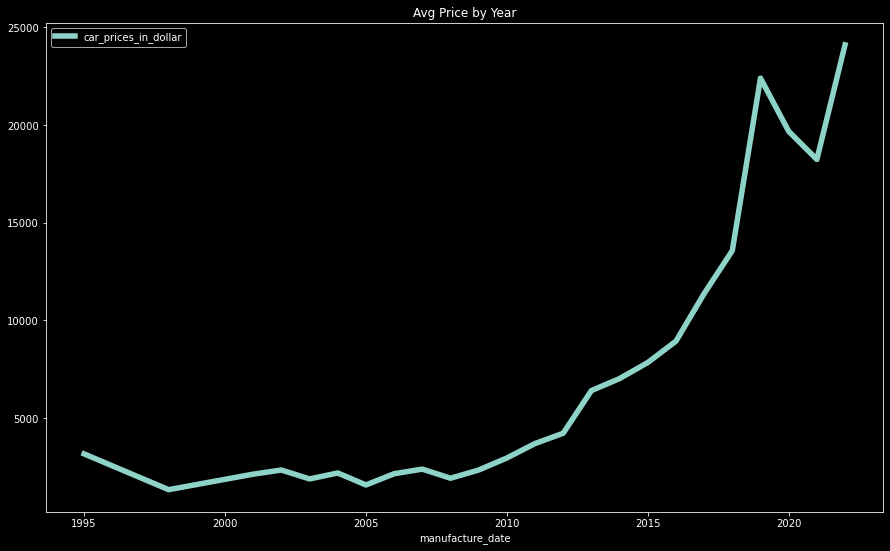

In [639]:
plt.style.use('dark_background')

pv1=pd.pivot_table(df, index=['manufacture_date'],values = ['car_prices_in_dollar'],aggfunc = 'mean') 
pv1.plot(kind='line',linewidth=5.5,figsize=(15,9),title='Avg Price by Year')

In [640]:
df.info() 
df = pd.get_dummies(df, columns=['ownership','transmission','fuel_type','Seats','manufacture_date'], drop_first=True)

y = df['car_prices_in_dollar']
X = df.drop(columns=['car_prices_in_dollar','car_name'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print('Length of our Training data:', X_train.shape, '\nLength of our Testing data:', y_test.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5389 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_name              5389 non-null   object 
 1   car_prices_in_dollar  5389 non-null   float64
 2   miles_driven          5389 non-null   int64  
 3   fuel_type             5389 non-null   object 
 4   transmission          5389 non-null   object 
 5   ownership             5389 non-null   int64  
 6   manufacture_date      5389 non-null   int64  
 7   engine (cc)           5389 non-null   int64  
 8   Seats                 5389 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 421.0+ KB
Length of our Training data: (4311, 40) 
Length of our Testing data: (1078,)


,car_name,car_prices_in_dollar,miles_driven,engine (cc),ownership_1,ownership_2,ownership_3,ownership_4,ownership_5,transmission_Manual,...,manufacture_date_2013,manufacture_date_2014,manufacture_date_2015,manufacture_date_2016,manufacture_date_2017,manufacture_date_2018,manufacture_date_2019,manufacture_date_2020,manufacture_date_2021,manufacture_date_2022
0,Jeep Compass 2.0 Longitude Option BSIV,12231.71,53578,1956,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,Renault Duster RXZ Turbo CVT,15646.34,8231,1330,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Toyota Camry 2.5 G,20000.00,37495,2494,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Honda Jazz VX CVT,9475.61,16588,1199,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Volkswagen Polo 1.2 MPI Highline,6280.49,43131,1199,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [641]:
model = tf.keras.models.Sequential(
  [                
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
]
)

In [642]:

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])

In [643]:
epochs = 25
model.fit(X_train, y_train, epochs=epochs, validation_split=0.1)

Epoch 1/25
122/122 [==============================] - 1s 4ms/step - loss: -2382742016.0000 - acc: 0.0000e+00 - val_loss: -8158481408.0000 - val_acc: 0.0000e+00
Epoch 2/25
122/122 [==============================] - 0s 3ms/step - loss: -33561008128.0000 - acc: 0.0000e+00 - val_loss: -71039787008.0000 - val_acc: 0.0000e+00
Epoch 3/25
122/122 [==============================] - 0s 3ms/step - loss: -170366959616.0000 - acc: 0.0000e+00 - val_loss: -273456250880.0000 - val_acc: 0.0000e+00
Epoch 4/25
122/122 [==============================] - 0s 3ms/step - loss: -493705560064.0000 - acc: 0.0000e+00 - val_loss: -686451458048.0000 - val_acc: 0.0000e+00
Epoch 5/25
122/122 [==============================] - 0s 3ms/step - loss: -1093423726592.0000 - acc: 0.0000e+00 - val_loss: -1394650382336.0000 - val_acc: 0.0000e+00
Epoch 6/25
122/122 [==============================] - 0s 3ms/step - loss: -2041655853056.0000 - acc: 0.0000e+00 - val_loss: -2442341908480.0000 - val_acc: 0.0000e+00
Epoch 7/25
122/122

In [644]:
#model evaluation
model.evaluate(X_test, y_test)

34/34 [==============================] - 0s 2ms/step - loss: -141841882152960.0000 - acc: 0.0000e+00


[-141841882152960.0, 0.0]

In [645]:
# load the data 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [646]:
x_train = x_train / 255
x_test = x_test / 255

In [647]:
print('scratch CNN accuracy', model.evaluate(x_test, y_test)[1])

ValueError: in user code:

    File "c:\Users\Alexv\anaconda3\lib\site-packages\keras\engine\training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\Alexv\anaconda3\lib\site-packages\keras\engine\training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Alexv\anaconda3\lib\site-packages\keras\engine\training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\Alexv\anaconda3\lib\site-packages\keras\engine\training.py", line 1756, in test_step
        y_pred = self(x, training=False)
    File "c:\Users\Alexv\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Alexv\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_7' (type Sequential).
    
    Input 0 of layer "dense_21" is incompatible with the layer: expected axis -1 of input shape to have value 40, but received input with shape (None, 28, 28)
    
    Call arguments received by layer 'sequential_7' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 28, 28), dtype=float32)
      • training=False
      • mask=None
